In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X, Y = make_classification(n_samples=100,n_features=2, n_informative=1, n_redundant=0,n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=20)

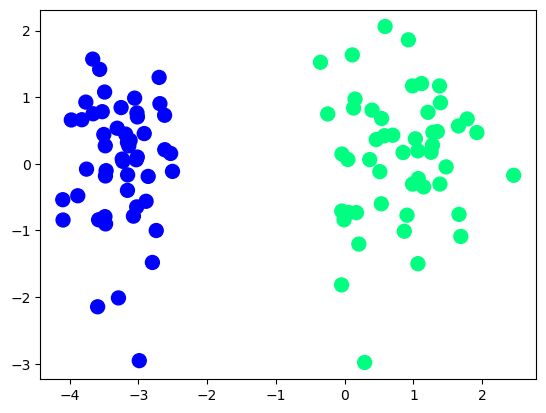

In [5]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='winter', s=100)

In [6]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none', solver='sag')
lor.fit(X,Y)

c:\Users\rohan\anaconda3\envs\DL\Lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\rohan\anaconda3\envs\DL\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [7]:
print(lor.coef_)
print(lor.intercept_)

[[4.8191344  0.21469886]]
[5.7971531]


In [11]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1]) 

In [12]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

In [13]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [20]:
def gd(X, Y):
    X = np.insert(X, 0,1, axis=1)
    weights = np.ones(X.shape[1])
    lr=0.5

    for i in range(5000):
        Y_hat = sigmoid(np.dot(X, weights))
        weights = weights + lr*(np.dot((Y-Y_hat), X)/X.shape[0])

    return weights[1:], weights[0]


In [21]:
coef, intercept = gd(X, Y)
m2 = -(coef[0]/coef[1])
b2 = -(intercept/coef[1])
x_input2 = np.linspace(-3,3,100)
y_input2 = m2*x_input2 + b2


(-3.0, 2.0)

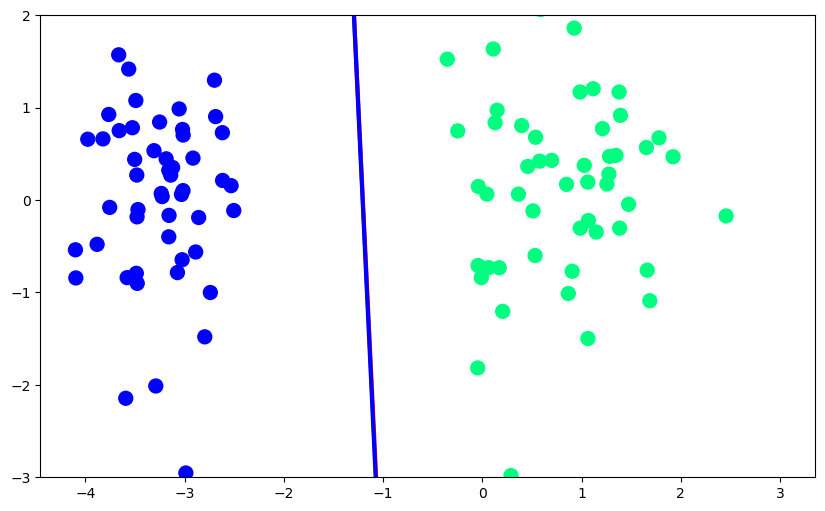

In [22]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.plot(x_input2, y_input2, color='blue', linewidth=3)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='winter', s=100)
plt.ylim(-3,2)